### EDA on books dataset

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#imporing the dataset
df1=pd.read_csv('/Users/bambino/Desktop/africa agility/books.csv',error_bad_lines=False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [461]:
#setting the index to bookID
df1.index=df1['bookID']
df1=df1.drop('bookID',axis=1)

In [410]:
#changing the language codes to their full names
df1['language_code']=df1['language_code'].str.replace('fre','French').str.replace('eng','English').str.replace('en-US','English-USA').str.replace('spa','Spanish').str.replace('en-GB','English-British').str.replace('mul','Multiple Language').str.replace('grc','Ancient Greek').str.replace('enm','Middle English').str.replace('en-CA','English-Canadian').str.replace('ger','German').str.replace('jpn','Japanese').str.replace('ara','Arabic').str.replace('nl','Dutch').str.replace('zho','Chinese').str.replace('lat','Latin').str.replace('srp','Serbian').str.replace('por','Portugese').str.replace('ita','Italian').str.replace('rus','Russian').str.replace('msa','Modern Arabic').str.replace('glg','Galician').str.replace('wel','Welsh').str.replace('swe','Swedish').str.replace('nor','Norwegian').str.replace('tur','Turkish').str.replace('gla','Gaelic').str.replace('ale','Ale')
df1['language_code'].unique()

array(['English', 'English-USA', 'French', 'Spanish', 'English-British',
       'Multiple Language', 'Ancient Greek', 'Middle English',
       'English-Canadian', 'German', 'Japanese', 'Arabic', 'Dutch',
       'Chinese', 'Latin', 'Portugese', 'Serbian', 'Italian', 'Russian',
       'Modern Arabic', 'Galician', 'Welsh', 'Swedish', 'Norwegian',
       'Turkish', 'Gaelic', 'Ale'], dtype=object)

In [411]:
#splitting the authors column to get the main authors' name
df1['authors']=df1['authors'].str.split('/',expand=True)

In [412]:
df1.head(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,0439785960,9780439785969,English,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,0439358078,9780439358071,English,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,English,352,6333,244,11/1/2003,Scholastic


In [434]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
 12  rating_between      6388 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


In [462]:
df1['average_rating'].unique()

array([4.57, 4.49, 4.42, 4.56, 4.78, 3.74, 4.73, 4.38, 4.22, 4.21, 3.44,
       3.87, 4.07, 3.9 , 3.83, 3.86, 3.91, 3.93, 4.59, 4.5 , 4.36, 4.53,
       3.84, 3.72, 4.  , 3.88, 4.33, 3.45, 3.76, 3.6 , 4.06, 4.17, 3.55,
       3.98, 4.13, 3.95, 4.24, 4.34, 3.92, 4.23, 3.75, 3.94, 3.77, 4.46,
       3.68, 3.99, 3.25, 3.89, 3.82, 3.78, 4.01, 4.35, 4.28, 3.34, 3.67,
       3.48, 3.5 , 3.62, 4.27, 3.39, 4.12, 4.08, 4.05, 3.85, 2.99, 4.19,
       3.71, 4.2 , 3.65, 3.4 , 4.11, 3.42, 4.02, 3.69, 4.1 , 3.66, 4.61,
       4.04, 3.97, 4.14, 3.57, 3.43, 3.22, 3.64, 3.96, 3.8 , 3.81, 3.79,
       3.23, 4.15, 4.39, 4.03, 3.73, 3.51, 3.63, 3.09, 3.59, 4.29, 0.  ,
       4.25, 4.26, 3.61, 4.16, 4.55, 4.52, 3.41, 4.7 , 4.18, 3.58, 4.51,
       3.15, 3.31, 4.09, 3.49, 3.56, 4.47, 4.44, 3.7 , 4.32, 4.4 , 4.31,
       4.43, 2.8 , 3.46, 2.83, 4.62, 2.67, 4.45, 4.3 , 5.  , 3.1 , 3.08,
       3.27, 3.33, 3.  , 4.67, 4.63, 3.52, 3.36, 3.54, 3.17, 4.37, 3.29,
       4.64, 3.38, 3.37, 3.16, 3.53, 2.88, 2.98, 3.

### top 5 books and authors with the highest ratings


In [9]:
df1.sort_values(by='average_rating',ascending=False)[:10]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes,5.0,0198145047,9780198145042,Ancient Greek,364,0,0,2/22/1922,Oxford University Press USA
39829,His Princess Devotional: A Royal Encounter Wit...,Sheri Rose Shepherd,5.0,1590529626,9781590529621,English,240,2,0,10/16/2007,Multnomah
17224,The Diamond Color Meditation: Color Pathway to...,John Diamond,5.0,1890995525,9781890995522,English,74,5,3,2/1/2006,Square One Publishers
36853,Tyrannosaurus Wrecks (Stanley #1),Laura Driscoll,5.0,0786845031,9780786845033,English,24,2,1,2/1/2003,Disney Press
38804,The Irish Anatomist: A Study of Flann O'Brien,Keith Donohue,5.0,1930901356,9781930901353,English,222,1,0,7/25/2003,Academica Press
17830,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,5.0,0533017424,9780533017423,English,202,4,0,1/1/1975,Vantage Press
25426,Delwau Duon: Peintiadau Nicholas Evans = Symph...,Nicholas Evans,5.0,0862431352,9780862431358,Welsh,150,1,0,6/22/1987,Y Lolfa
36492,Oliver Wendell Holmes in Paris: Medicine Theo...,William C. Dowling,5.0,1584655801,9781584655800,English,179,1,1,2/28/2007,University Press of New England
2560,Willem de Kooning: Late Paintings,Julie Sylvester,5.0,382960226X,9783829602266,English,83,1,0,9/1/2006,Schirmer Mosel


### Most occurring books

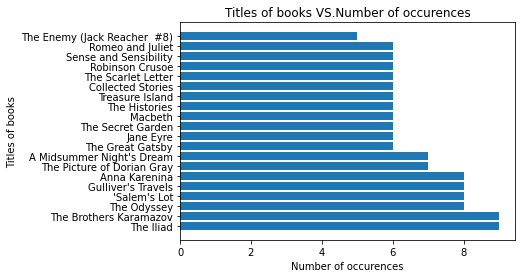

In [10]:
top=df1['title'].value_counts()[:20]
plt.barh(y=top.index,width=top.values)
plt.ylabel('Titles of books')
plt.xlabel('Number of occurences')
plt.title('Titles of books VS.Number of occurences');

The most occurring books are The Brothers Karamazov and The lliad

### Authors with the highest published books


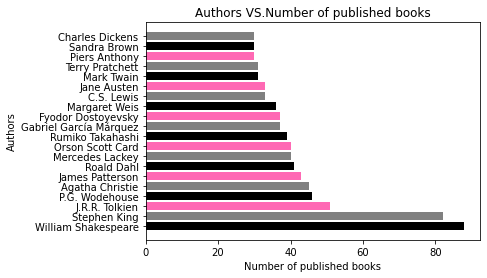

In [11]:
a=df1['authors'].value_counts().head(20)

plt.barh(a.index,width=a.values,color={'k','hotpink','gray'})
plt.ylabel('Authors')
plt.xlabel('Number of published books')
plt.title('Authors VS.Number of published books');

### Distribution of books for all languages


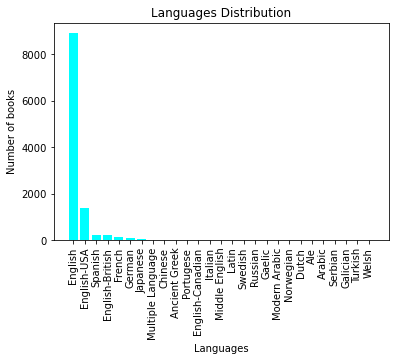

In [12]:
b=df1['language_code'].value_counts()
plt.bar(b.index,b.values,color='cyan')
plt.xticks(rotation=90)
plt.xlabel('Languages')
plt.ylabel('Number of books')
plt.title('Languages Distribution');

### Top 20 most rated books

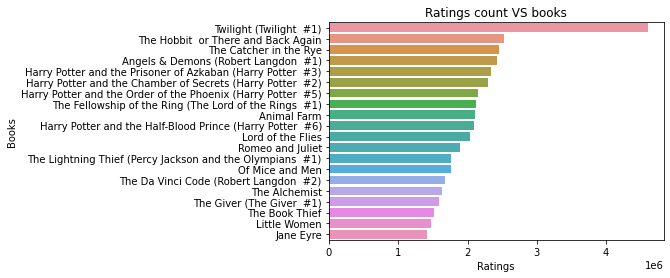

In [464]:
c=df1.sort_values('ratings_count',ascending=False).head(20).set_index('title')
c
sns.barplot(c['ratings_count'],c.index)
plt.title('Ratings count VS books')
plt.ylabel('Books')
plt.xlabel('Ratings');

Twilight (Twilight #1),The Hobbit or There and Back Again and The Catcher in the Rye have the highest ratings count

## Is there a relationship between the number of pages and ratings?


In [14]:
df1['average_rating'].corr(df1['  num_pages'])

0.15047661307500804

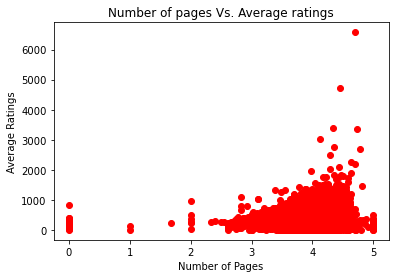

In [15]:
plt.scatter(df1.average_rating, df1['  num_pages'],color='r')
plt.ylabel('Average Ratings')
plt.xlabel('Number of Pages')
plt.title('Number of pages Vs. Average ratings');

0.15 is a very weak correlation. There isn't much relationship between the ratings and number of pages each book has due to the massive prescence of outliers so lets try num of pages between 0 and 1000.

In [16]:
t=df1[df1['  num_pages']<1000]

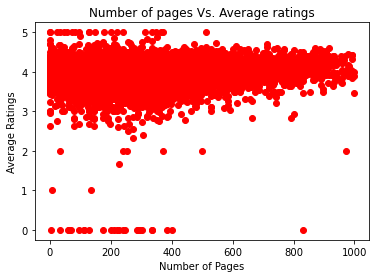

In [17]:
plt.scatter(t['  num_pages'], t['average_rating'],color='r')
plt.ylabel('Average Ratings')
plt.xlabel('Number of Pages')
plt.title('Number of pages Vs. Average ratings');

The scatter plot shows that books with less number of pages have a higher average rating. It could lead to the fact that most of the people seem to prefer books with a moderate amount of pages, and that thicker books seems to scare people away.

### Books with the highest reviews

In [18]:
d=df1.sort_values('text_reviews_count',ascending=False).set_index('title')[:10]
Explode=[0.4,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

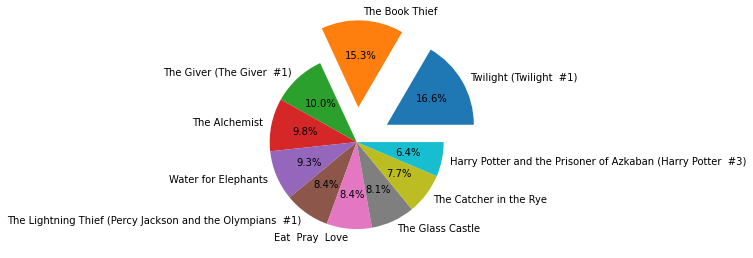

In [19]:
plt.pie(d['text_reviews_count'],labels=d.index,explode=Explode,autopct='%1.1f%%')
plt.show()

Twilight(Twilight #1) and The book thief have the highest text reviews.

## Popularity based recommendation system

In [165]:
c=df1.sort_values('ratings_count',ascending=False).head(20).set_index('title')
pd.DataFrame(c)
print('New User?\nYou might want to check out these books!\n')
print(c['ratings_count'])

New User?
You might want to check out these books!

title
Twilight (Twilight  #1)                                         4597666
The Hobbit  or There and Back Again                             2530894
The Catcher in the Rye                                          2457092
Angels & Demons (Robert Langdon  #1)                            2418736
Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)     2339585
Harry Potter and the Chamber of Secrets (Harry Potter  #2)      2293963
Harry Potter and the Order of the Phoenix (Harry Potter  #5)    2153167
The Fellowship of the Ring (The Lord of the Rings  #1)          2128944
Animal Farm                                                     2111750
Harry Potter and the Half-Blood Prince (Harry Potter  #6)       2095690
Lord of the Flies                                               2036679
Romeo and Juliet                                                1893917
The Lightning Thief (Percy Jackson and the Olympians  #1)       1766725
Of Mic

### Rate of publication in the last ten years 

In [159]:
df1['publication_date'].unique()

array(['9/16/2006', '9/1/2004', '11/1/2003', ..., '5/31/1998',
       '7/10/1977', '10/11/2003'], dtype=object)

In [283]:
df1['year']=df1['publication_date'].str.split('/',expand=True)[2]

In [301]:
#f=df1['year'].value_counts().head(10)
#f=df1.sort_values(by='year')
df=df1.groupby('year')['title'].count()
df=df.sort_values().tail(20)

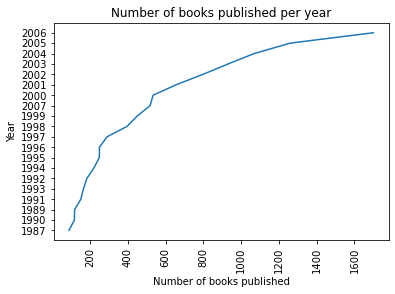

In [302]:
#a=df1['text_'].iloc[30:]
#b=df1['year'].iloc[30:]
#plt.figure(figsize=(15,7))
plt.plot(df.values,df.index)
plt.xticks(rotation=90)
plt.xlabel('Number of books published')
plt.ylabel('Year')
plt.title('Number of books published per year')
plt.show()

From the graph above, we can see that the number of books published per year increased massively.

In [197]:
df1['r']=df1['text_reviews_count']/df1['ratings_count']

In [193]:
s=df1.groupby('year')['text_reviews_count'].max().iloc[60:]

## Book Recommendation system
Collaborative based filtering

In [164]:
df1.tail(2)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
bookID,,,,,,,,,,,,
45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,English,434,769,139,2/27/2007,Ecco,2007
45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,Spanish,272,113,12,5/28/2006,Edimat Libros,2006


In [468]:
df1.loc[(df1['average_rating']>=0) & (df1['average_rating']<=1),'rating_between']='between_0_to_1'
df1.loc[(df1['average_rating']>1) & (df1['average_rating']<=2),'rating_between']='between_1_to_2'
df1.loc[(df1['average_rating']>2) & (df1['average_rating']<=3),'rating_between']='between_2_to_3'
df1.loc[(df1['average_rating']>3) & (df1['average_rating']<=4),'rating_between']='between_3_to_4'
#df1.loc[(df1['average_rating']>4) & (df1['average_rating']<=5),'rating_between']='between_4_to_5'
#df1.loc[(df1['average_rating']>5) & (df1['average_rating']<=6),'rating_between']='between_5_to_6'
#df1.loc[(df1['average_rating']>6) & (df1['average_rating']<=7),'rating_between']='between_6_to_7'
#df1.loc[(df1['average_rating']>7) & (df1['average_rating']<=8),'rating_between']='between_7_to_8'
#df1.loc[(df1['average_rating']>8) & (df1['average_rating']<=9),'rating_between']='between_8_to_9'''

In [469]:
df1.head(1)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating_between
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN


In [470]:
new=df1[['average_rating','ratings_count']]
df1_model=np.asarray([np.asarray(new['average_rating']),np.asarray(new['ratings_count'])]).T
df1_model

array([[4.570000e+00, 2.095690e+06],
       [4.490000e+00, 2.153167e+06],
       [4.420000e+00, 6.333000e+03],
       ...,
       [3.960000e+00, 8.200000e+02],
       [3.720000e+00, 7.690000e+02],
       [3.910000e+00, 1.130000e+02]])

In [471]:
from sklearn.cluster import KMeans

In [472]:
score=[]
x=df1_model
for cluster in range(1,41):
    kmeans=KMeans(n_clusters=cluster, init="k-means++",random_state=40)
    kmeans.fit(x)
    score.append(kmeans.inertia_)

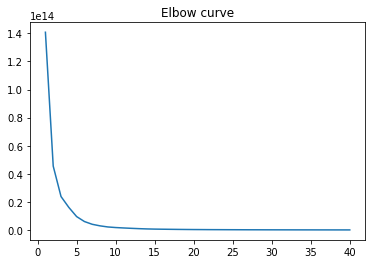

In [473]:
plt.plot(range(1,41),score)
plt.title('Elbow curve');

In [474]:
btw_df1=df1['rating_between'].str.get_dummies(sep=',')
btw_df1.head()

,between_0_to_1,between_1_to_2,between_2_to_3,between_3_to_4
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [475]:
lan=df1['language_code'].str.get_dummies(sep=',')
lan.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [476]:
features=pd.concat([btw_df1,lan,df1['average_rating'],df1['ratings_count']],axis=1)
features.head()

,between_0_to_1,between_1_to_2,between_2_to_3,between_3_to_4,ale,ara,en-CA,en-GB,en-US,eng,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4.57,2095690
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4.49,2153167
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4.42,6333
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4.56,2339585
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4.78,41428


In [477]:
from sklearn.preprocessing import MinMaxScaler

In [478]:
mms=MinMaxScaler()
features=mms.fit_transform(features)

In [479]:
from sklearn import neighbors

In [480]:
engm=neighbors.NearestNeighbors(n_neighbors=6,algorithm='ball_tree')

In [481]:
engm.fit(features)

NearestNeighbors(algorithm='ball_tree', n_neighbors=6)

In [482]:
distance, indices=engm.kneighbors(features)

In [484]:
def book_recommend(book_name):
    bklist=[]
    book_ID=df1[df1['title']==book_name].index
    book_ID=book_ID[0]
    for new in indices[book_ID]:
        bklist.append(df1.loc[new].title)
        #print(df1.loc[newid].title)
    return bklist

In [486]:
book_recommend("Notes from a Small Island")

['Notes from a Small Island',
 'Glass Houses (The Morganville Vampires  #1)',
 'Pygmalion',
 'Dreamland',
 'The Maltese Falcon',
 'Messenger (The Giver  #3)']

In [431]:
#second method
def get_index(name):
    return df1[df1['title']==name].index.tolist([0])
all_book=list(df1['title'].values)
def get_id(partial):
    for name in all_book:
        if partial in name:
            print(name,all_book.index(name))
def rec(query=None,id=None):
    if id:
        for id in indices(id)[1:]:
            print(df1.iloc[id]['title'])
    if query:
        fid=get_index
        for id in indices[fid][1:]:
            print(df1.iloc[id]['title'])
    

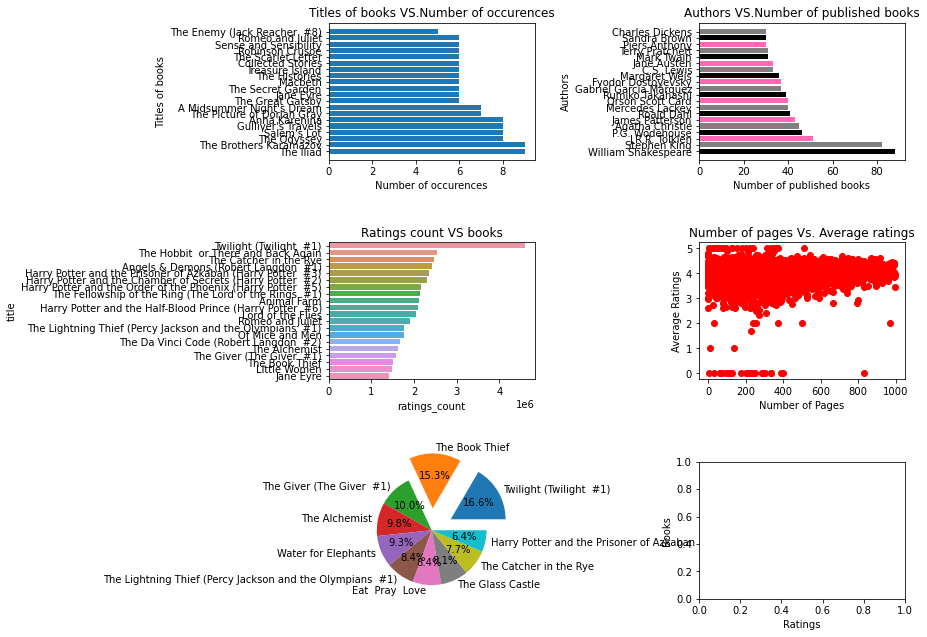

In [238]:
#subplotting all graphs
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(10,10))
top=df1['title'].value_counts()[:20]
ax[0,0].barh(y=top.index,width=top.values)
ax[0,0].set_ylabel('Titles of books')
ax[0,0].set_xlabel('Number of occurences')
ax[0,0].set_title('Titles of books VS.Number of occurences')
a=df1['authors'].value_counts().head(20)

ax[0,1].barh(a.index,width=a.values,color={'k','hotpink','gray'})
ax[0,1].set_ylabel('Authors')
ax[0,1].set_xlabel('Number of published books')
ax[0,1].set_title('Authors VS.Number of published books');


c=df1.sort_values('ratings_count',ascending=False).head(20).set_index('title')
c
sns.barplot(ax=ax[1,0],x=c['ratings_count'],y=c.index)
ax[1,0].set_title('Ratings count VS books')
plt.ylabel('Books')
plt.xlabel('Ratings');

ax[1,1].scatter(t['  num_pages'], t['average_rating'],color='r')
ax[1,1].set_ylabel('Average Ratings')
ax[1,1].set_xlabel('Number of Pages')
ax[1,1].set_title('Number of pages Vs. Average ratings');

ax[2,0].pie(d['text_reviews_count'],labels=d.index,explode=Explode,autopct='%1.1f%%')
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.8,hspace=0.6)
plt.show()

#### Conclusion
Should phones be seized from teens and replaced with paper books? No, phones are the main form of communication amongst teens. However, this doesn't mean they need to be on them all day. So, how do we help them become curios readers? We need to give them a reason to read! Give them a platform where they can freely discover their thirst for knowledge, Paper books should be converted to software format to help peek teenagers' interests in reading. Researchers have found that data connecting too much social media time with mental health, suggests a limit use of 2 hours per today to allow time for other activities like reading

The biggest negative impact is the decline in reading. Reading books is one of the best ways to mold your thinking, expand your horizons,deepens knowledge of people and places, learn how to solve and understand critical and complex problems. It is important for being a successful school student, a productive citizen and employee.

The biggest negative impact is the decline in reading. Reading books is one of the best ways to mold your thinking, expand your horizons,deepens knowledge of people and places, learn how to solve and understand critical and complex problems. It is important for being a successful school student, a productive citizen and employee. 